# K-Nearest Neigbors Classifier - Random Dataset

In [73]:
from sklearn.datasets import make_blobs

from mlxtend.plotting import plot_decision_regions
import time
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##### Generating the data

In [58]:
# Generates 1000 normally distributed points around a specified center
# Returns 2 arrays, 1 with coordinates and 1 with labels
inputs, target = make_blobs(n_samples = 1000,
                            centers = [(-3, 3), (0, 0), (2, 2)],
                            random_state = 365)

In [59]:
# X and Y coordinates
inputs

array([[ 1.63046017,  2.09402946],
       [-2.81125197,  3.85224116],
       [ 0.50105079,  1.58253051],
       ...,
       [-0.58897444,  0.31771066],
       [-2.3285928 ,  4.95748895],
       [-0.40093516, -0.18595288]])

In [60]:
inputs.shape, target.shape

((1000, 2), (1000,))

In [61]:
# Target labels
target[:50]

array([2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 2, 0, 1])

In [62]:
data = pd.DataFrame(data = inputs, columns = ['Feature 1', 'Feature 2'])
data['Target'] = target
data

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


##### Plotting the data

In [63]:
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

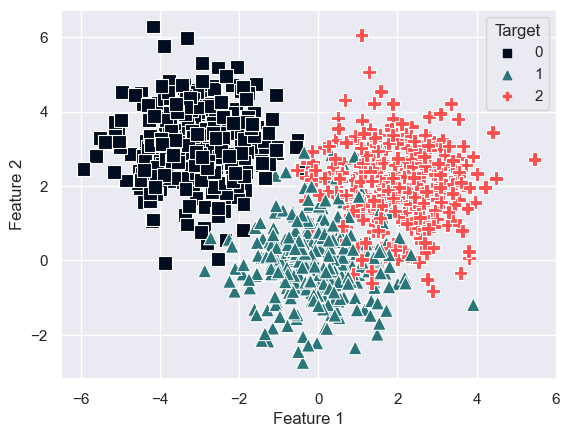

In [64]:
# Scatterplot
sns.scatterplot(x = 'Feature 1', y = 'Feature 2',
                data = data,
                hue = 'Target',
                palette = knn_palette,
                markers = [',', '^', 'P'],
                style = 'Target',
                s = 100)

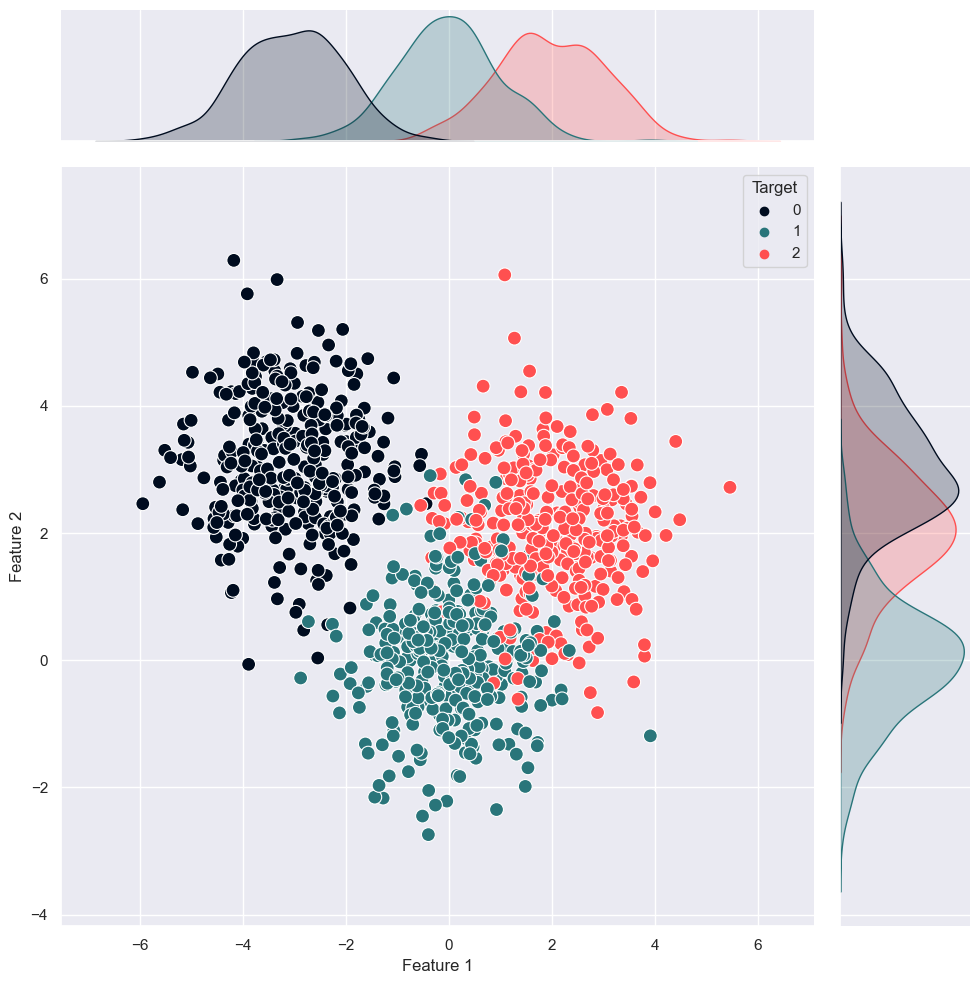

In [65]:
# Jointplot -> Scatterplot and distributions to show all data is normally distributed
# Cant use markers in jointplot
sns.jointplot(x = 'Feature 1', y = 'Feature 2',
              data = data,
              hue = 'Target',
              palette = knn_palette,
              height = 10,
              s = 100,
              legend = True)

##### Train-test split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target)

##### KNN model

In [67]:
classifier = KNeighborsClassifier(n_neighbors = 2, weights = 'distance')
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

##### Predicting

In [68]:
feature_1 = -0.18
feature_2 = 3.2

In [69]:
classifier.predict([[feature_1, feature_2]])

array([2])

##### Visualizing the neighbors

In [70]:
# Gives us the euclidian distances from closest neighbors and their indexes in the training data (x_train)
neighbors = classifier.kneighbors([[feature_1, feature_2]])
neighbors

(array([[0.27086818, 0.34749744]]), array([[336, 215]], dtype=int64))

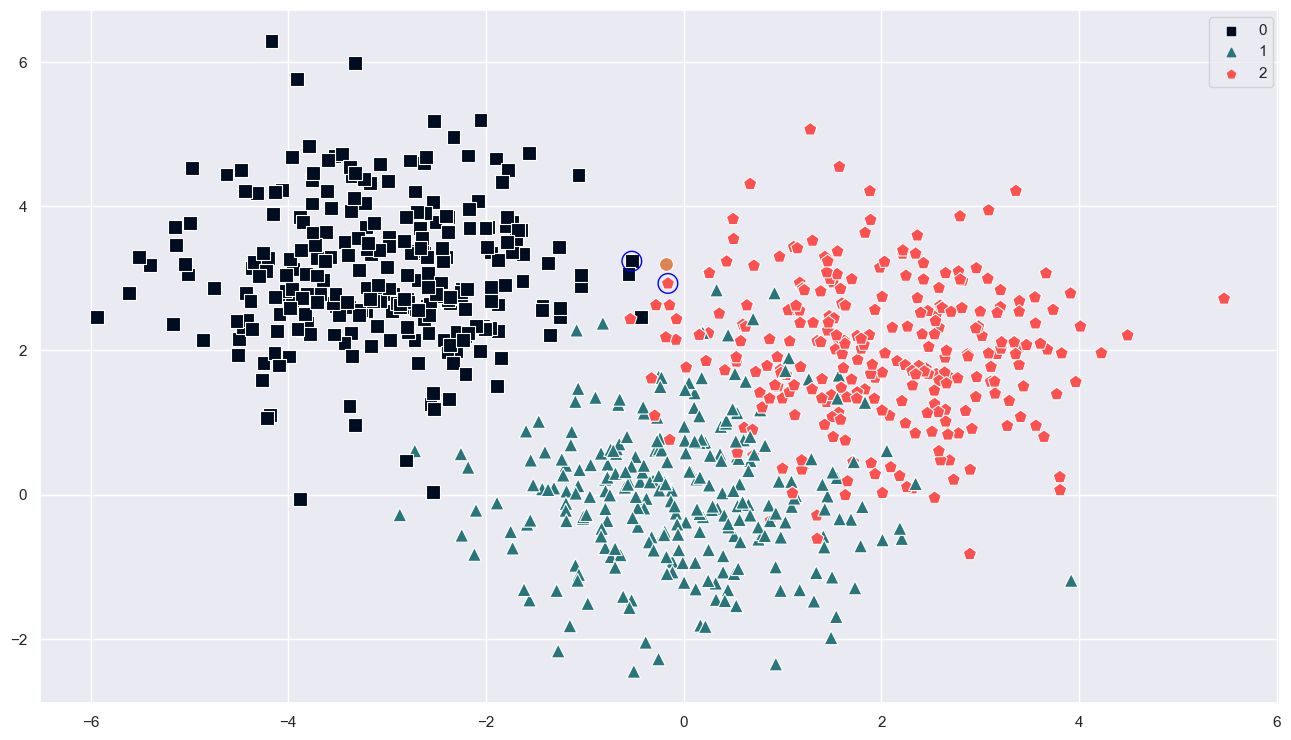

In [71]:
plt.figure(figsize= (16,9))
# x_train[:, 0] all x-coordinates | x_train[:, 1] all y-coordinates
# Plotting all the training data points
sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
                hue = y_train,
                palette = knn_palette,
                markers = [',', '^', 'p'],
                style = y_train,
                s = 100,
                legend = True)

# Adding our classified point
sns.scatterplot(x = [feature_1], y = [feature_2],
                style = [feature_2],
                markers= ['o'],
                s = 100,
                legend = False)

# Circling the closest points
plot_x_train = []
plot_y_train = []

# neighbors[1] = indexes of neighbors
for i in neighbors[1]:
    # X-coordinates of neighbors
    plot_x_train.append(x_train[i, 0])
    # Y-coordinates of neighbors
    plot_y_train.append(x_train[i, 1])

plt.scatter(x = plot_x_train, y = plot_y_train,
            s = 200,
            facecolors='none',
            edgecolors='blue')


##### Parameters of the model

In [72]:
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'distance'}

##### Decision regions

Time elapsed: 0.3 seconds


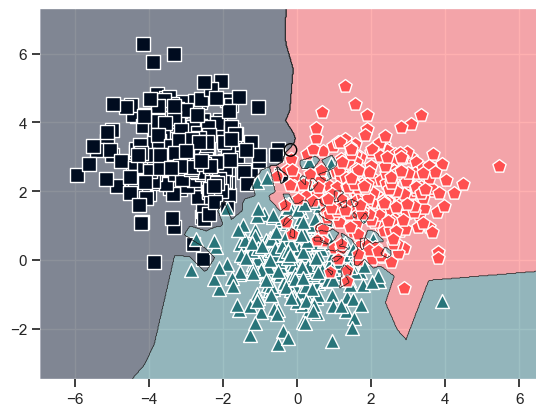

In [76]:
# Start timing
start = time.time()
# Plot training data
# Highlight our single point
# Classifier = Our KNN classifier
# markers same as before
# colors same as before, can't use palette here
# Kwargs - s = size | edgecolor = marker edge color | alpha = transparency of the markers
# legend - if we want the tooltip or not 
plot_decision_regions(X = x_train, y = y_train,
                      X_highlight = np.array([[feature_1, feature_2]]),
                      clf = classifier,
                      markers = [',', '^', 'p'],
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs= {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)

end = time.time()

print(f'Time elapsed: {round(end - start, 1)} seconds')